In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Function to load arrays and calculate mean and std dev
def load_and_process_folder(folder_path):
    means = []
    std_devs = []
    for file_name in sorted(os.listdir(folder_path)):
        if file_name.endswith(".npy"):
            array_path = os.path.join(folder_path, file_name)
            array = np.load(array_path)
            means.append(array.mean())
            std_devs.append(array.std())
    return means, std_devs

In [3]:
ndvi_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDVI-Array"
sdmi_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDMI-Array"
savi_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\SAVI-Array"

In [4]:
# Define the path to the climate data CSV file as a string
climate_data_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\monthly_averages_formatted.csv"

# Use the string path to read the climate data into a DataFrame
climate_df = pd.read_csv(climate_data_path)

# Convert the 'Year/Month' column to datetime format
climate_df['Date'] = pd.to_datetime(climate_df['Year/Month'], format='%Y/%m')
# Drop the original 'Year/Month' column as it's no longer needed
climate_df = climate_df.drop(columns=['Year/Month'])


In [5]:
# Load and process each type of satellite data
ndvi_means, ndvi_stds = load_and_process_folder(ndvi_path)
sdmi_means, sdmi_stds = load_and_process_folder(sdmi_path)
savi_means, savi_stds = load_and_process_folder(savi_path)

In [6]:
# Create a DataFrame for the satellite data statistics
satellite_df = pd.DataFrame({
    "NDVI_Mean": ndvi_means,
    "NDVI_Std": ndvi_stds,
    "SDMI_Mean": sdmi_means,
    "SDMI_Std": sdmi_stds,
    "SAVI_Mean": savi_means,
    "SAVI_Std": savi_stds
})

In [7]:


# Merge the satellite and climate data based on the Date
# Ensure the satellite_df has a 'Date' column that corresponds to the climate_df 'Date' column
# The following code assumes that the order of the rows in satellite_df matches the dates in climate_df
satellite_df['Date'] = climate_df['Date']
combined_df = pd.merge(satellite_df, climate_df, on='Date')

# Now 'combined_df' contains all the information ready for model training

In [10]:
print(climate_data_path)

C:\Users\Musae\Documents\GitHub-REPOs\Senior-project_Doc\monthly_averages_formatted.csv


In [11]:
# Assuming you have the lists: ndvi_means, savi_means, sdmi_means, ndvi_stds, savi_stds, sdmi_stds
# Create a DataFrame from the satellite data
satellite_df = pd.DataFrame({
    "NDVI_Mean": ndvi_means,
    "NDVI_Std": ndvi_stds,
    "SAVI_Mean": savi_means,
    "SAVI_Std": savi_stds,
    "SDMI_Mean": sdmi_means,
    "SDMI_Std": sdmi_stds
})

# Concatenate the satellite data with the climate data along the columns axis (axis=1)
combined_df = pd.concat([climate_df.reset_index(drop=True), satellite_df], axis=1)


In [12]:
from sklearn.model_selection import train_test_split

# Split the features and target variable
# Assuming you want to predict NDVI_Mean; adjust if using a different target
X = combined_df.drop(['NDVI_Mean', 'Date'], axis=1)  # Features
y = combined_df['NDVI_Mean']                         # Target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data with the same scaler
X_val_scaled = scaler.transform(X_val)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on the validation set: {mse}")


Mean Squared Error on the validation set: 3.307507114264708e-14


In [16]:
#combined_df.to_csv('combined_data.csv', index=False)


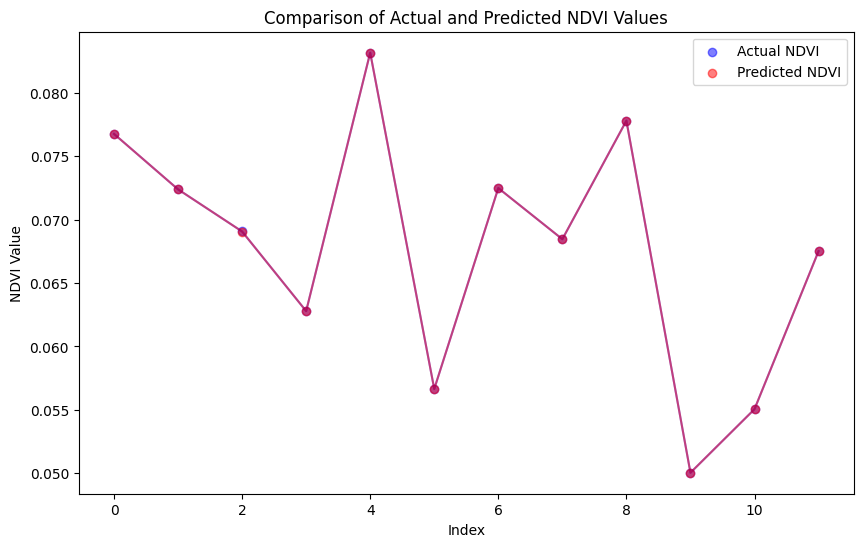

In [17]:
# Assuming 'y_val' is a Pandas Series or a list containing the actual NDVI values from the validation set,
# and 'y_val_pred' contains the predicted NDVI values from your model, the following code will plot the results:

import matplotlib.pyplot as plt

# Convert the actual and predicted values to lists, if they aren't already
y_val_list = y_val.tolist() if isinstance(y_val, pd.Series) else y_val
y_val_pred_list = y_val_pred.tolist() if isinstance(y_val_pred, pd.Series) else y_val_pred

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val_list)), y_val_list, color='blue', label='Actual NDVI', alpha=0.5)
plt.scatter(range(len(y_val_pred_list)), y_val_pred_list, color='red', label='Predicted NDVI', alpha=0.5)

# Plot a line for actual and predicted values for clearer comparison (optional)
plt.plot(y_val_list, color='blue', alpha=0.5)
plt.plot(y_val_pred_list, color='red', alpha=0.5)

# Title and labels
plt.title('Comparison of Actual and Predicted NDVI Values')
plt.xlabel('Index')
plt.ylabel('NDVI Value')

# Legend
plt.legend()

# Show the plot
plt.show()



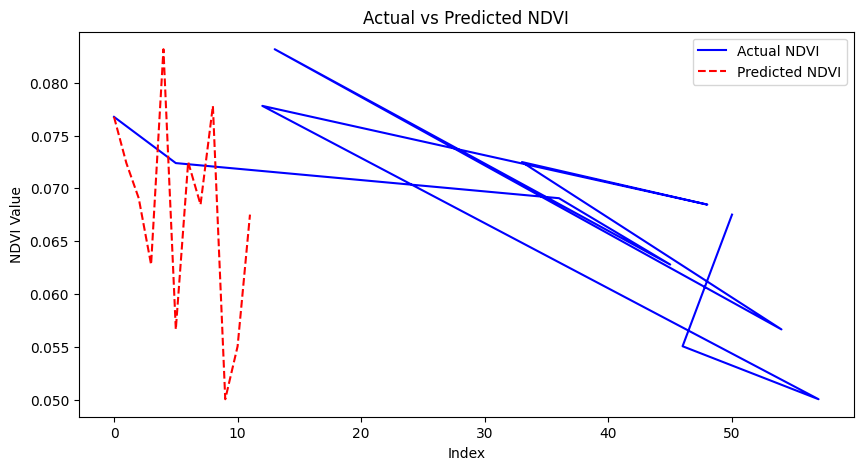

In [18]:
import matplotlib.pyplot as plt

# Assuming 'y_val' is your array of actual NDVI values from the validation set
# and 'y_val_pred' is the array of predicted NDVI values from your model.

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_val, label='Actual NDVI', color='blue')
plt.plot(y_val_pred, label='Predicted NDVI', color='red', linestyle='--')

# Add title and labels
plt.title('Actual vs Predicted NDVI')
plt.xlabel('Index')
plt.ylabel('NDVI Value')

# Show legend
plt.legend()

# Show plot
plt.show()
